In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import influxdb_client
from influxdb_client.client.write_api import SYNCHRONOUS

bucket = "racing"
org = "b4mad"
token="PFmq_uLsJ8NZXYuq9zBbNsCbxuerXIapE4N_2kjLzyWauLyZqbscrEJRJw25upSJ1-tKJQAJa8GfItx7Sl4SOw=="
url="https://telemetry.b4mad.racing/"

client = influxdb_client.InfluxDBClient(
   url=url,
   token=token,
   org=org
)

query_api = client.query_api()

query = f"""
from(bucket: "{bucket}")
  |> range(start: -30d, stop: now())
  |> filter(fn: (r) => r["_measurement"] == "laps")
  |> filter(fn: (r) => r["_field"] == "TrackPositionPercent" or r["_field"] == "Brake" or r["_field"] == "CurrentLap")
  |> filter(fn: (r) => r["SessionId"] == "e65cbf77-b938-4f92-859f-1f447e238bf0")
  |> pivot(rowKey: ["_time"], columnKey: ["_field"], valueColumn: "_value")
  |> sort(columns: ["_time"], desc: false)
  |> keep(columns: ["_time", "CarModel", "TrackCode", "Brake", "TrackPositionPercent", "CurrentLap"])
  |> fill(usePrevious: true, column: "CurrentLap")
  |> fill(usePrevious: true, column: "Brake")
"""

df = query_api.query_data_frame(org=org, query=query)

In [12]:
for c in df.columns:
    print(c, len(df[c].unique()))

result 1
table 1
_time 3724
CarModel 1
TrackCode 1
Brake 532
CurrentLap 5
TrackPositionPercent 3707


/Users/mhild/.local/share/virtualenvs/ai-FSqG2juA/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:677: UserWarning: The handle <matplotlib.lines.Line2D object at 0x29ac70820> has a label of '_time' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


<AxesSubplot:xlabel='datetime'>

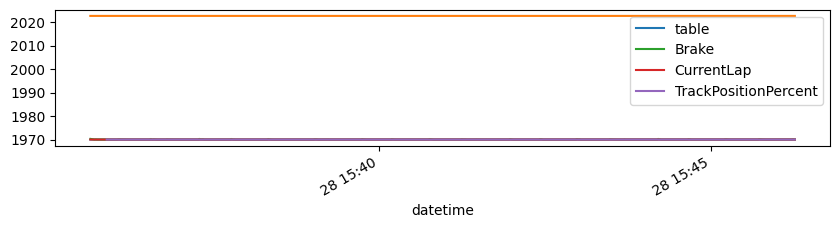

In [15]:
df['datetime'] = pd.to_datetime(df['_time'])
df.set_index('datetime',inplace=True)
df.sort_index(inplace=True)
plt.rcParams["figure.figsize"] = (10,2)
df.plot()

In [20]:
#df= df.pivot(index='TrackPositionPercent',columns=['CurrentLap', 'Brake'], values=['CurrentLap', 'Brake'])
#df= df.pivot(index='TrackPositionPercent',columns=['CurrentLap', 'Brake']) 
df


ValueError: Index contains duplicate entries, cannot reshape

In [21]:
#df['Gear'].replace('N',0,inplace=True)

#df.index = pd.to_datetime(df.index)
#df.sort_index(inplace=True)
df

,result,table,_time,CarModel,TrackCode,Brake,CurrentLap,TrackPositionPercent
datetime,,,,,,,,
2022-08-28 15:35:39.512000+00:00,_result,0,2022-08-28 15:35:39.512000+00:00,Formula Trainer,Monza-Monza_1991,NaN,1.0,0.000000
2022-08-28 15:35:39.693000+00:00,_result,0,2022-08-28 15:35:39.693000+00:00,Formula Trainer,Monza-Monza_1991,100.000000,1.0,NaN
2022-08-28 15:35:43.410000+00:00,_result,0,2022-08-28 15:35:43.410000+00:00,Formula Trainer,Monza-Monza_1991,0.000000,1.0,NaN
2022-08-28 15:35:43.910000+00:00,_result,0,2022-08-28 15:35:43.910000+00:00,Formula Trainer,Monza-Monza_1991,14.695001,1.0,NaN
2022-08-28 15:35:44.077000+00:00,_result,0,2022-08-28 15:35:44.077000+00:00,Formula Trainer,Monza-Monza_1991,28.806672,1.0,NaN
...,...,...,...,...,...,...,...,...
2022-08-28 15:46:14.644000+00:00,_result,0,2022-08-28 15:46:14.644000+00:00,Formula Trainer,Monza-Monza_1991,7.135004,5.0,0.475549
2022-08-28 15:46:14.810000+00:00,_result,0,2022-08-28 15:46:14.810000+00:00,Formula Trainer,Monza-Monza_1991,0.000000,5.0,0.475554
2022-08-28 15:46:14.977000+00:00,_result,0,2022-08-28 15:46:14.977000+00:00,Formula Trainer,Monza-Monza_1991,0.000000,5.0,0.475557


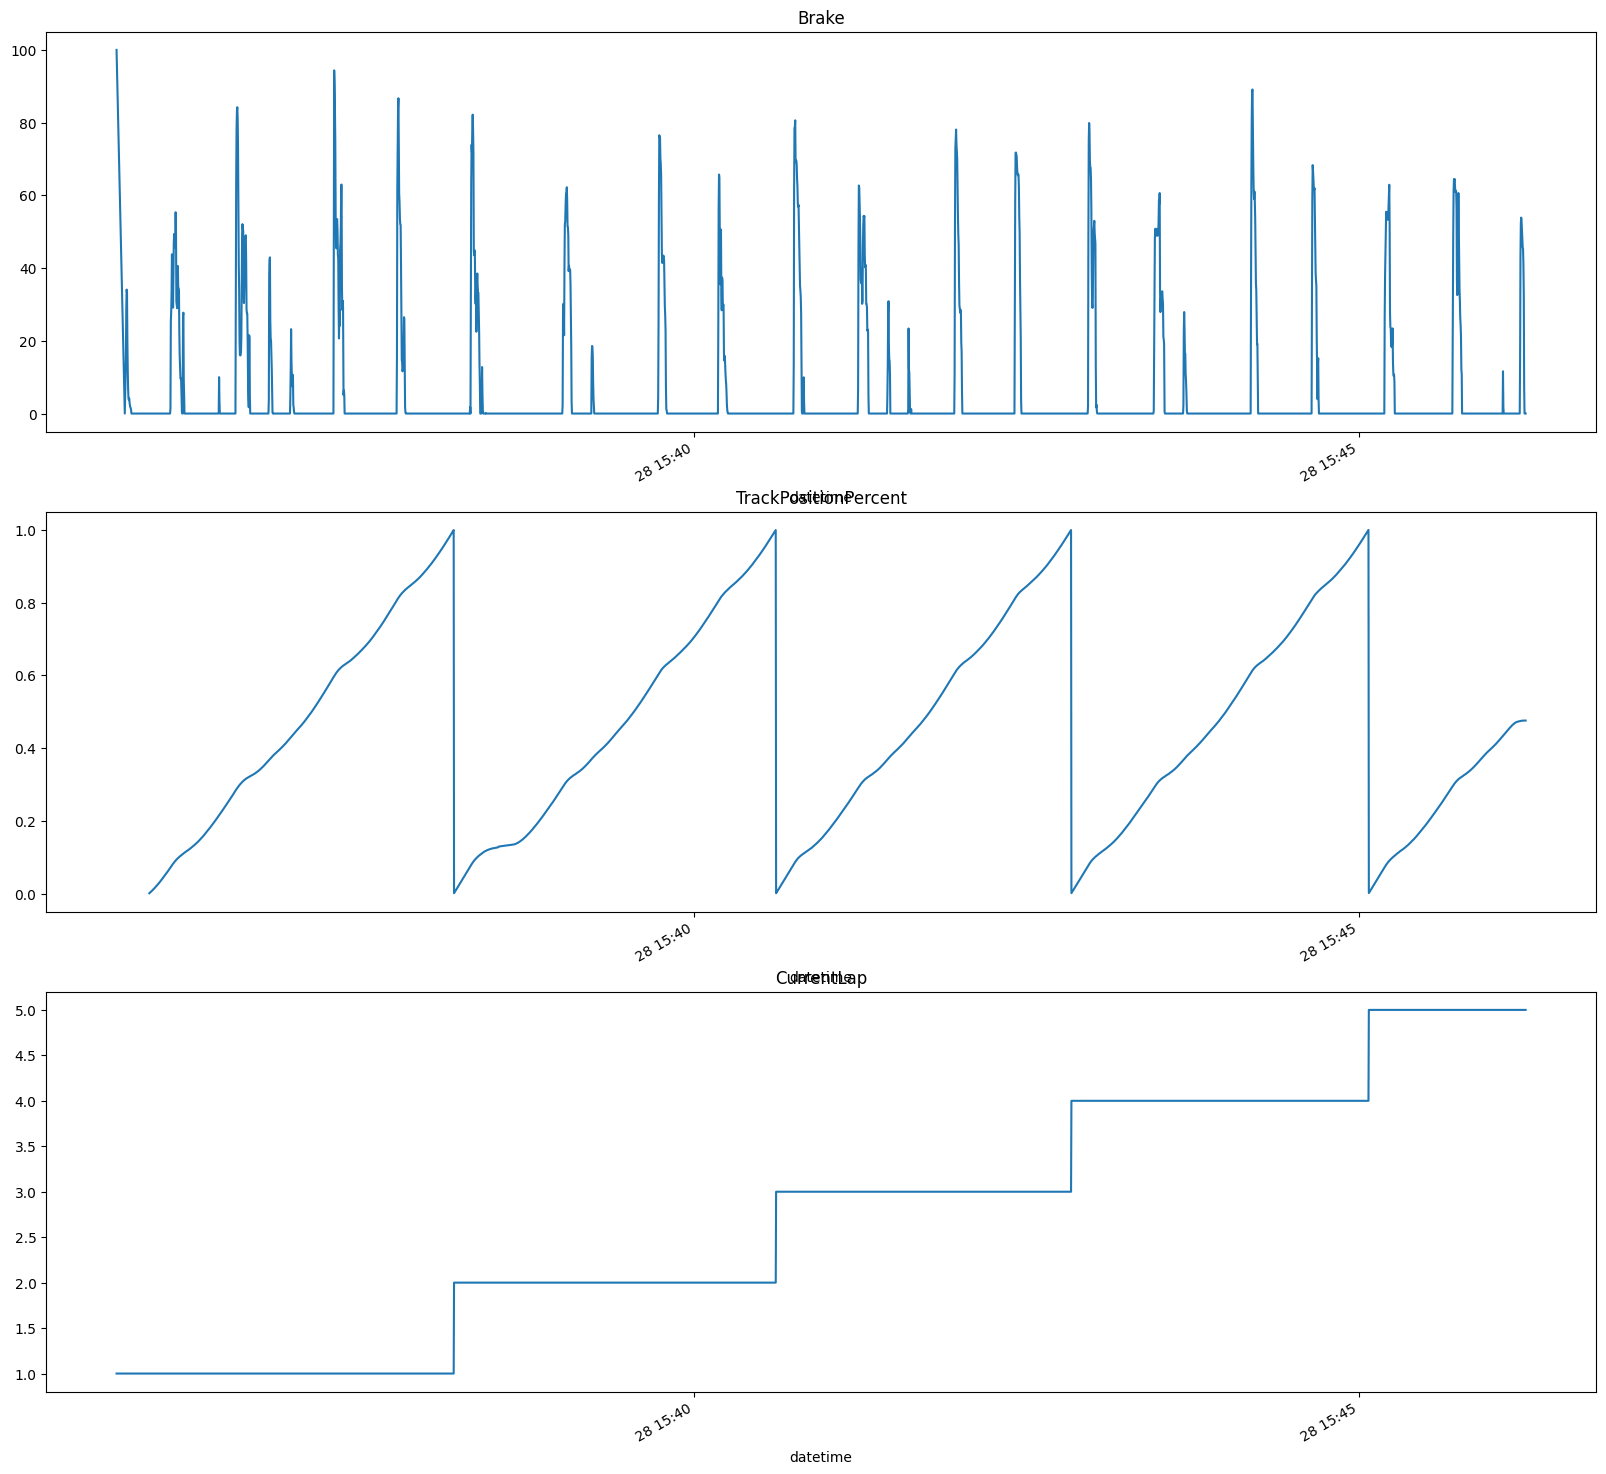

In [25]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)
cols=['Brake', 'TrackPositionPercent', 'CurrentLap']
fig, ax = plt.subplots(len(cols))
for i, c in enumerate(cols):
    df[c].astype(float).plot(ax=ax[i])
    ax[i].set_title(c)
plt.show()


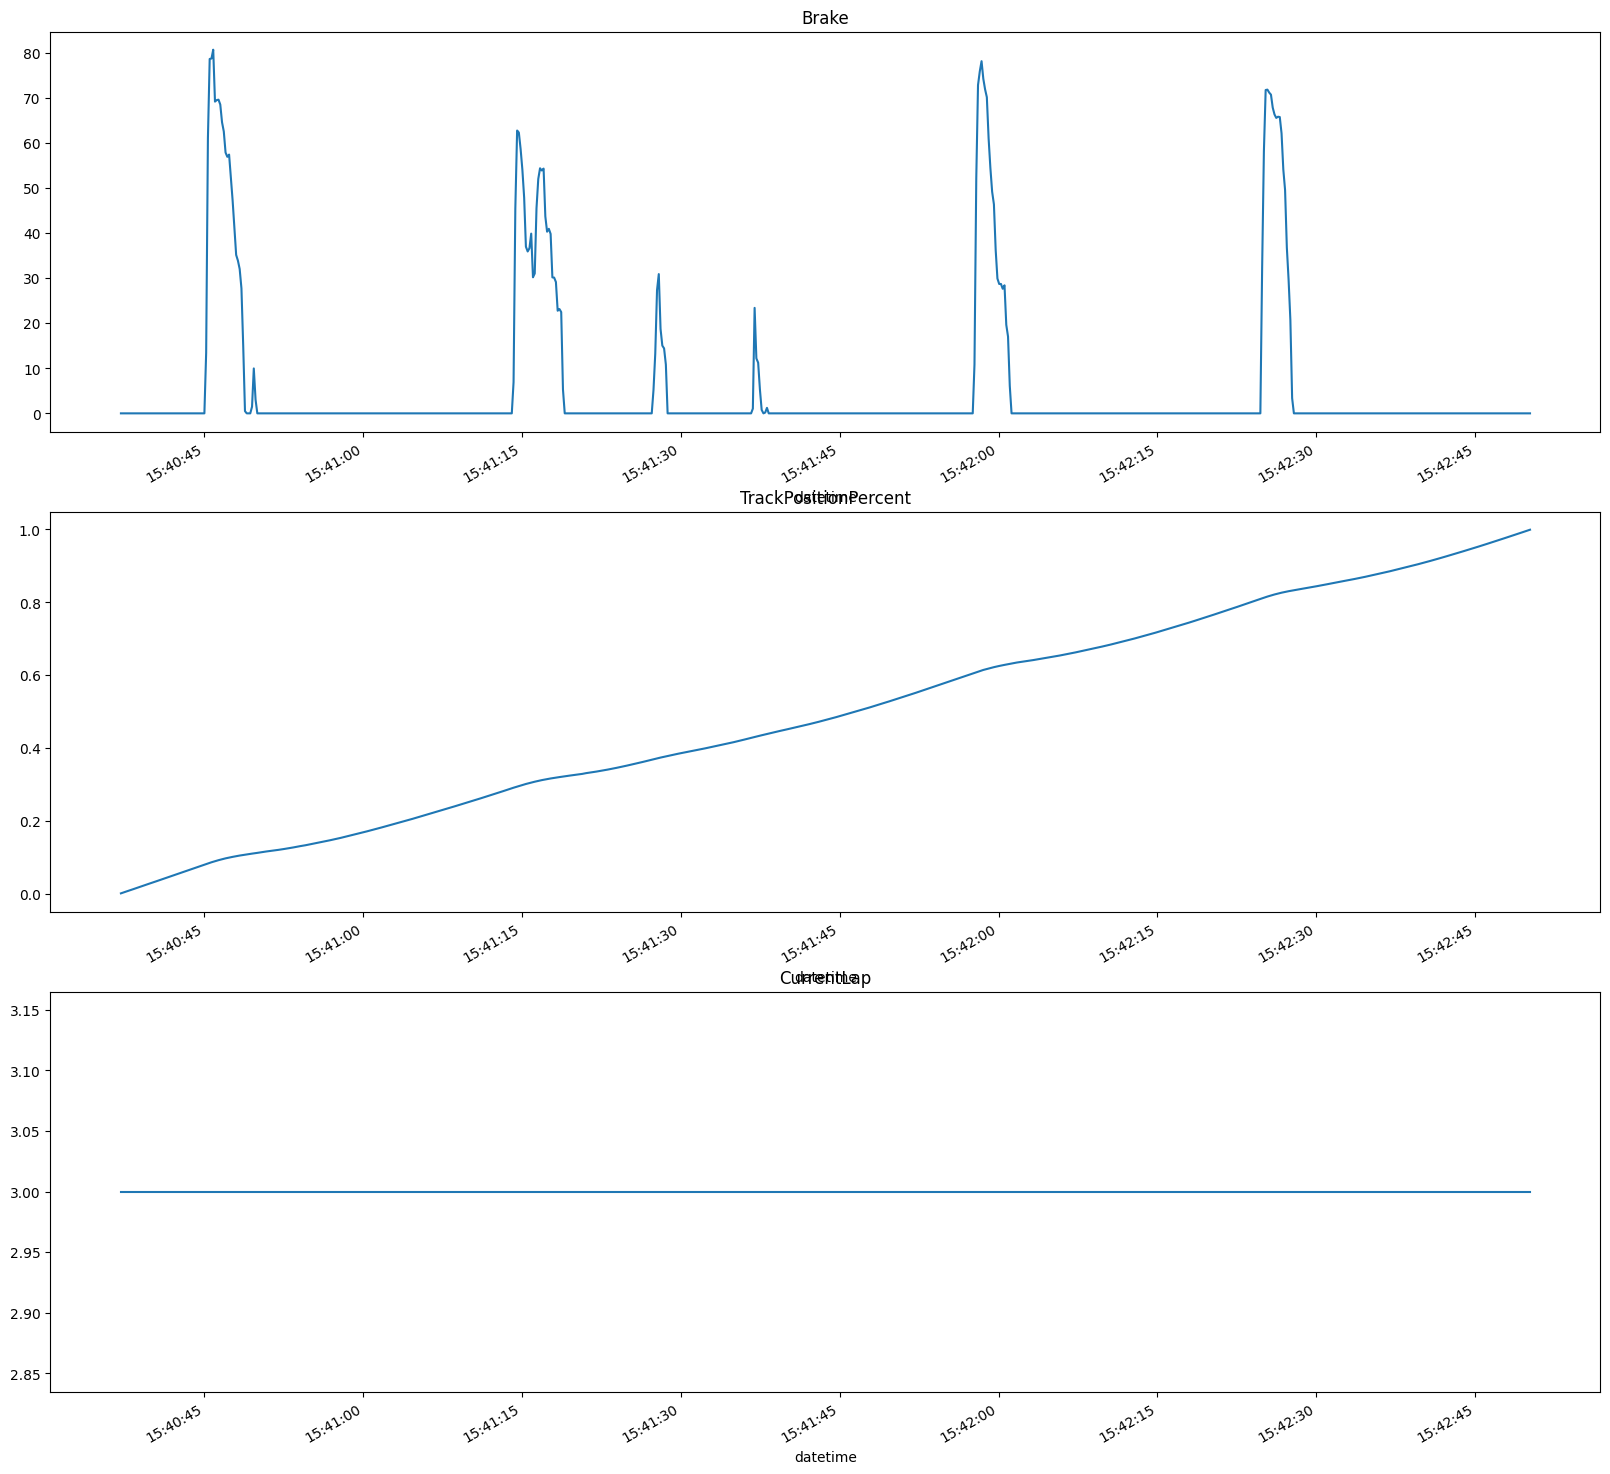

In [31]:
lap = 3
df[df['CurrentLap']==lap]
plt.rcParams["figure.figsize"] = (20,20)
fig, ax = plt.subplots(len(cols))
for i, c in enumerate(cols):
    df.loc[df['CurrentLap']==lap,c].astype(float).plot(ax=ax[i])
    ax[i].set_title(c)
plt.show()


In [32]:
df[df['CurrentLap']==lap]


,result,table,_time,CarModel,TrackCode,Brake,CurrentLap,TrackPositionPercent
datetime,,,,,,,,
2022-08-28 15:40:37.111000+00:00,_result,0,2022-08-28 15:40:37.111000+00:00,Formula Trainer,Monza-Monza_1991,0.0,3.0,0.000829
2022-08-28 15:40:37.277000+00:00,_result,0,2022-08-28 15:40:37.277000+00:00,Formula Trainer,Monza-Monza_1991,0.0,3.0,0.002579
2022-08-28 15:40:37.443000+00:00,_result,0,2022-08-28 15:40:37.443000+00:00,Formula Trainer,Monza-Monza_1991,0.0,3.0,0.004135
2022-08-28 15:40:37.610000+00:00,_result,0,2022-08-28 15:40:37.610000+00:00,Formula Trainer,Monza-Monza_1991,0.0,3.0,0.005824
2022-08-28 15:40:37.777000+00:00,_result,0,2022-08-28 15:40:37.777000+00:00,Formula Trainer,Monza-Monza_1991,0.0,3.0,0.007400
...,...,...,...,...,...,...,...,...
2022-08-28 15:42:49.526000+00:00,_result,0,2022-08-28 15:42:49.526000+00:00,Formula Trainer,Monza-Monza_1991,0.0,3.0,0.992868
2022-08-28 15:42:49.693000+00:00,_result,0,2022-08-28 15:42:49.693000+00:00,Formula Trainer,Monza-Monza_1991,0.0,3.0,0.994474
2022-08-28 15:42:49.860000+00:00,_result,0,2022-08-28 15:42:49.860000+00:00,Formula Trainer,Monza-Monza_1991,0.0,3.0,0.996083


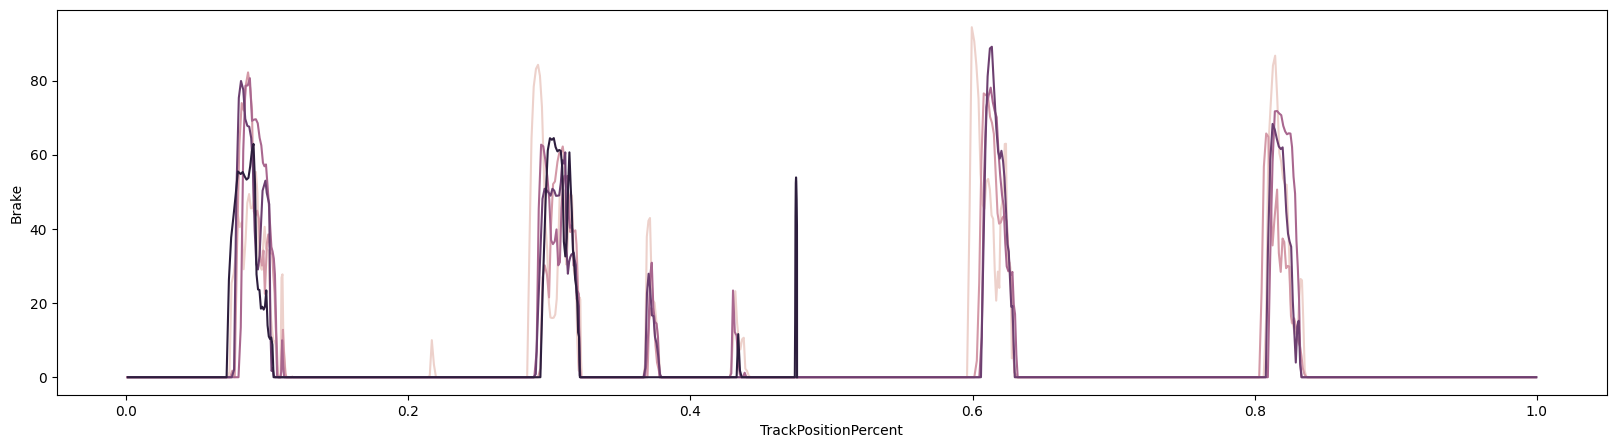

In [37]:
import seaborn as sns

plt.rcParams["figure.figsize"] = (20,5)
for c in ['Brake']:
    sns.lineplot(data=df,x='TrackPositionPercent',y=c,hue='CurrentLap', legend=False)
    plt.show()